# **Task-2**

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas
from geodatasets import get_path 
import folium 
from folium.plugins import HeatMap




In [52]:
df = pd.read_csv('Dataset  (1).csv')

### **Task-1**
### **Task: Restaurant Ratings**
### **Analyze the distribution of aggregate ratings and determine the most common rating range**

In [53]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [54]:
agg_rating_distribution = df['Aggregate rating'].value_counts()
print(agg_rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [55]:
a = agg_rating_distribution.idxmax()
print('Max xommon rating range is :',a)

Max xommon rating range is : 0.0


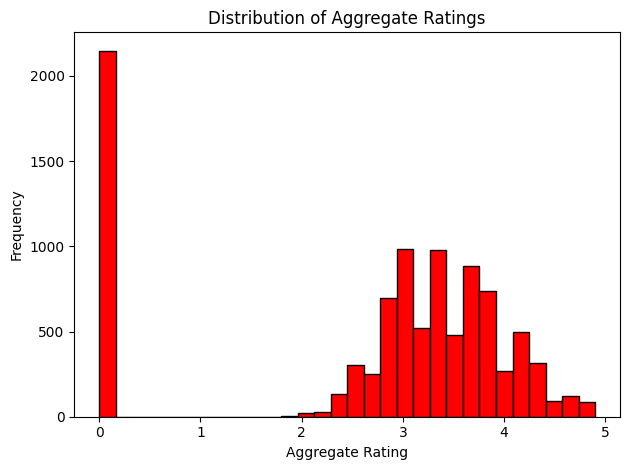

In [56]:
plt.hist(df['Aggregate rating'].dropna(), bins=30, color='red', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.tight_layout()
plt.show()

### ***Calculate the average number of votes received by restaurants***

In [57]:
avg_vote = round(df['Votes'].mean(),3)
print('The average number of votes receivd by restaurants : ',avg_vote)

The average number of votes receivd by restaurants :  156.91


## **Task-2**

### **Task: Cuisine Combination**

### ***Identify the most common combinations of cuisines in the dataset***

In [58]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [59]:
common_combinations =df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
Top10 = common_combinations.head(10)
print('Top 10 most common combination are :',Top10)

Top 10 most common combination are : Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


#### **Determine if certain cuisine combinations tend to have higher ratings**

In [60]:
max_rating = common_combinations.iloc[0]
print('The Max rating is ; ',max_rating)

The Max rating is ;  4.9


In [61]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [62]:
max_rating_rest = df.loc[df['Aggregate rating'] == max_rating]
print('restaurants haveing the maximun rating :',max_rating_rest['Restaurant Name'])

restaurants haveing the maximun rating : 3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


## **Task-3**


In [63]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### **Task: Geographic Analysis**

### **Plot the locations of restaurants on a map using longitude and latitude coordinates.**

In [64]:
print(df[['Longitude','Longitude']])

       Longitude   Longitude
0     121.027535  121.027535
1     121.014101  121.014101
2     121.056831  121.056831
3     121.056475  121.056475
4     121.057508  121.057508
...          ...         ...
9546   28.977392   28.977392
9547   29.041297   29.041297
9548   29.034640   29.034640
9549   29.036019   29.036019
9550   29.026016   29.026016

[9551 rows x 2 columns]


In [65]:
gdf=geopandas.GeoDataFrame (

    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

In [66]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<Axes: >

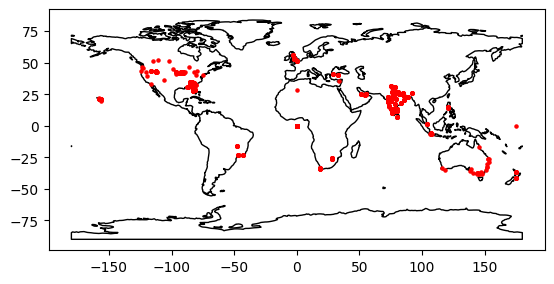

In [67]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color="white", edgecolor='black')

gdf.plot(ax=ax, marker='o', color='red', markersize=5)

In [68]:
plt.show()


In [69]:
world_map = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=1,
    height="100%",
    width="100%"
)

In [70]:
heat_marker=[[row['Latitude'],row['Longitude']] for i , row in  df.iterrows()]
HeatMap(heat_marker,radius=10).add_to(world_map)

In [71]:
world_map

### **Identify if there are any restaurant chains present in the dataset.**

In [72]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [73]:
restuarant_chain = df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new=restuarant_chain[restuarant_chain["OutletCount"] > 1]
restuarant_chain=new.sort_values(by="OutletCount",ascending=False)

In [74]:
print(restuarant_chain[['Restaurant Name','OutletCount']].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


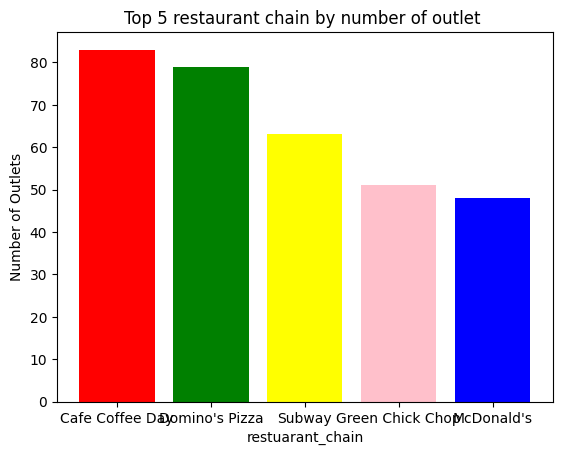

In [75]:
col= ['red','green','yellow','pink','blue']
plt.bar(restuarant_chain['Restaurant Name'][:5],restuarant_chain['OutletCount'][:5],color=col)
plt.xlabel('restuarant_chain')
plt.ylabel('Number of Outlets')
plt.title("Top 5 restaurant chain by number of outlet ")
plt.show()

### ***Analyze the ratings and popularity of different restaurant chains***

In [76]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [77]:
ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Average rating').sort_values(by='Average rating', ascending=False)
print(ratings)


                               Restaurant Name  Average rating
5946                                    Solita             4.9
6045  Spiral - Sofitel Philippine Plaza Manila             4.9
2354                                 Flat Iron             4.9
5477                     Sagar Gaire Fast Food             4.9
651                                        Bao             4.9
...                                        ...             ...
5099                           Punjabi Special             0.0
7391                          Zaika Muradabadi             0.0
5097                Punjabi Shahi Chicken Soup             0.0
7388                          Zaika Kathi Roll             0.0
2425                            Food On Wheels             0.0

[7446 rows x 2 columns]


In [78]:
ratings = df.groupby('Restaurant Name')['Votes'].mean().reset_index(name='Total Votes').sort_values(by='Total Votes', ascending=False)
print(ratings)


                   Restaurant Name  Total Votes
6943                          Toit      10934.0
2879              Hauz Khas Social       7931.0
4902                     Peter Cat       7574.0
783                    Big Brewsky       5705.0
6449               The Black Pearl       5385.0
...                            ...          ...
1371                   Chap Corner          0.0
5255                 Ramlal Sweets          0.0
5251       Ramesh Caterers & Dhaba          0.0
5244                Rama Fast Food          0.0
5232  Raju Vaishno Amritsari Dhaba          0.0

[7446 rows x 2 columns]


In [79]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [83]:
col= ['red','green','yellow','pink','blue']
plt.bar(ratings['Restaurant Name'][:5],ratings['Average rating'][:5],color=col)
plt.xlabel('restuarant_chain')
plt.ylabel('Average rating')
plt.title("Top 5 restaurant chain by Average rating ")
plt.show()

KeyError: 'Average rating'